In [1]:
## Machine Learning Online Class
#  Exercise 7 | Principle Component Analysis and K-Means Clustering
#
#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  exercise. You will need to complete the following functions:
#
#     pca.m
#     projectData.m
#     recoverData.m
#     computeCentroids.m
#     findClosestCentroids.m
#     kMeansInitCentroids.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#


from matplotlib import use, cm
import matplotlib.image as mpimg
use('Agg')
import numpy as np
import scipy.io
import scipy.misc
import matplotlib.pyplot as plt
from findClosestCentroids import findClosestCentroids
from computeCentroids import computeCentroids
from runkMeans import runkMeans
from kMeansInitCentroids import kMeansInitCentroids



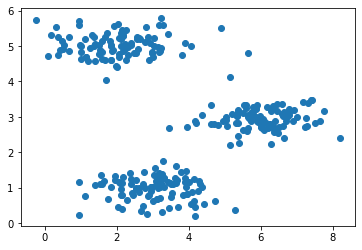

In [2]:
%matplotlib inline
# Load an example dataset that we will be using
# 可视化
data = scipy.io.loadmat('ex7data2.mat')
X = data['X']
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [3]:
## ================= Part 1: Find Closest Centroids ====================
#  To help you implement K-Means, we have divided the learning algorithm 
#  into two functions -- findClosestCentroids and computeCentroids. In this
#  part, you shoudl complete the code in the findClosestCentroids function. 
#

print ('Finding closest centroids.')

# Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the
# initial_centroids
val, idx = findClosestCentroids(X, initial_centroids)

print ('Closest centroids for the first 3 examples:')
print (idx[0:3])
print ('(the closest centroids should be 0, 2, 1 respectively)')

Finding closest centroids.
Closest centroids for the first 3 examples:
[0. 2. 1.]
(the closest centroids should be 0, 2, 1 respectively)


In [4]:
## ===================== Part 2: Compute Means =========================
#  After implementing the closest centroids function, you should now
#  complete the computeCentroids function.
#
print ('Computing centroids means.')

#  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

print ('Centroids computed after initial finding of closest centroids:')
for c in centroids:
    print (c)

print ('(the centroids should be')
print ('   [ 2.428301 3.157924 ]')
print ('   [ 5.813503 2.633656 ]')
print ('   [ 7.119387 3.616684 ]')


Computing centroids means.
Centroids computed after initial finding of closest centroids:
[2.42830111 3.15792418]
[5.81350331 2.63365645]
[7.11938687 3.6166844 ]
(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


Running K-Means clustering on example dataset.
K-Means iteration 0/10...


/root/jupyter_projects/Coursera-Stanford-ML-Python-master/ex7/plotProgresskMeans.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroids[:, 0], centroids[:, 1],


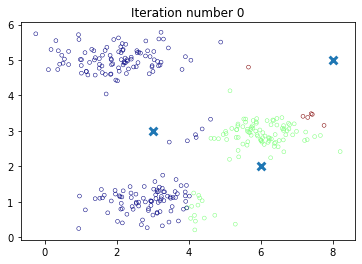

K-Means iteration 1/10...


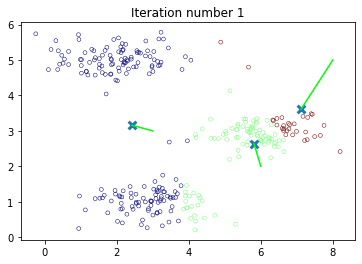

K-Means iteration 2/10...


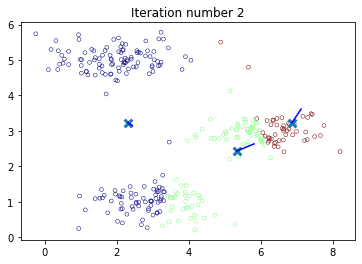

K-Means iteration 3/10...


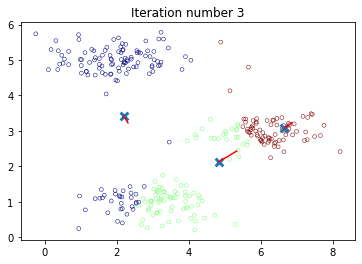

K-Means iteration 4/10...


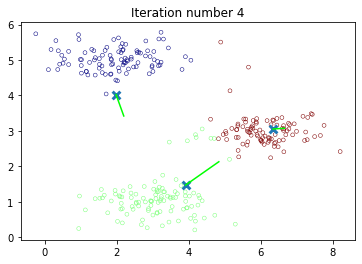

K-Means iteration 5/10...


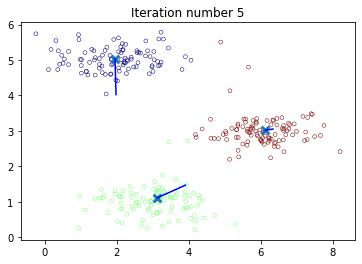

K-Means iteration 6/10...


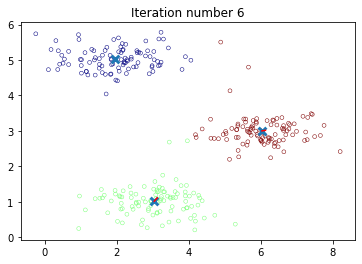

K-Means iteration 7/10...


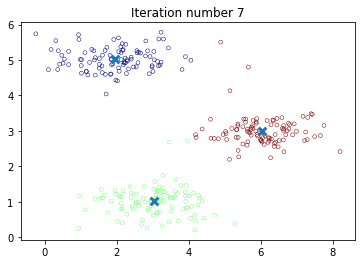

K-Means iteration 8/10...


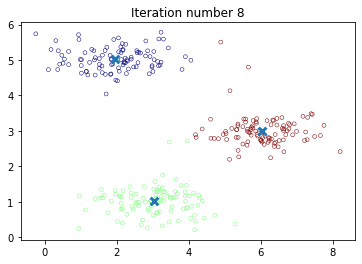

K-Means iteration 9/10...


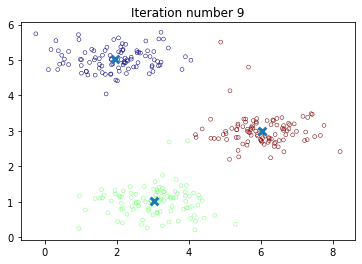

K-Means Done.


In [5]:
## =================== Part 3: K-Means Clustering ======================
#  After you have completed the two functions computeCentroids and
#  findClosestCentroids, you have all the necessary pieces to run the
#  kMeans algorithm. In this part, you will run the K-Means algorithm on
#  the example dataset we have provided. 
#
print ('Running K-Means clustering on example dataset.')

# Load an example dataset
data = scipy.io.loadmat('ex7data2.mat')
X = data['X']

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = [[3, 3], [6, 2], [8, 5]]

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)
print ('K-Means Done.')

In [6]:
## ============= Part 4: K-Means Clustering on Pixels ===============
#  In this exercise, you will use K-Means to compress an image. To do this,
#  you will first run K-Means on the colors of the pixels in the image and
#  then you will map each pixel on to it's closest centroid.
#  
#  You should now complete the code in kMeansInitCentroids.m
#

print ('Running K-Means clustering on pixels from an image.')

#  Load an image of a bird
A = mpimg.imread('bird_small.png')
#A.show()
# If imread does not work for you, you can try instead
#   load ('bird_small.mat')

#A = A.getdata() / 255.0 # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape(img_size[0] * img_size[1], 3)

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16 
max_iters = 10

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means

centroids, idx = runkMeans(X, initial_centroids, max_iters)


Running K-Means clustering on pixels from an image.
K-Means iteration 0/10...
K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...


In [7]:
array = np.random.randint(1,100,size=10)

Applying K-Means to compress an image.


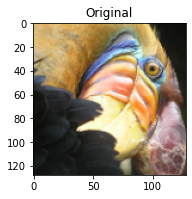

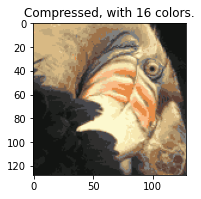

In [8]:
## ================= Part 5: Image Compression ======================
#  In this part of the exercise, you will use the clusters of K-Means to
#  compress an image. To do this, we first find the closest clusters for
#  each example. After that, we 

# 由255种像素点压缩至16种像素点（将255个像素点聚合为16类）

print('Applying K-Means to compress an image.')

# Find closest cluster members
_, idx = findClosestCentroids(X, centroids)

# Essentially, now we have represented the image X as in terms of the
# indices in idx. 

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by it's index in idx) to the centroid value
X_recovered = np.array([centroids[int(e)] for e in idx])

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3)

# Display the original image 
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Original')
plt.show()

# Display compressed image side by side
plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title('Compressed, with %d colors.' % K)
plt.show()